In [1]:
import pandas as pd
import requests

In [2]:
#Search astronauts
import requests
r = requests.get(url='http://api.open-notify.org/astros.json')
r.json()

{'message': 'success',
 'number': 7,
 'people': [{'craft': 'ISS', 'name': 'Sergey Ryzhikov'},
  {'craft': 'ISS', 'name': 'Kate Rubins'},
  {'craft': 'ISS', 'name': 'Sergey Kud-Sverchkov'},
  {'craft': 'ISS', 'name': 'Mike Hopkins'},
  {'craft': 'ISS', 'name': 'Victor Glover'},
  {'craft': 'ISS', 'name': 'Shannon Walker'},
  {'craft': 'ISS', 'name': 'Soichi Noguchi'}]}

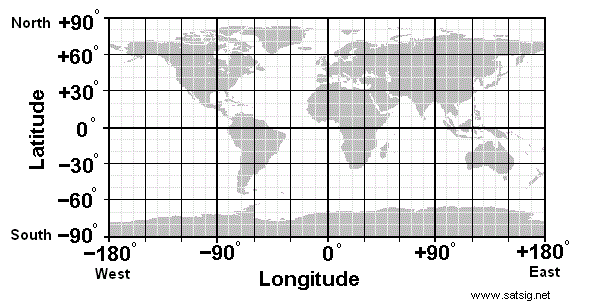

In [3]:
# http://www.satsig.net/lat_long.html
from IPython.display import Image
Image(filename='worldlatlog.gif', width='60%')

In [4]:
# http://www.satsig.net/lat_long.htm
def translate_geo_to_pixels(longitude, latitude, max_x_px, max_y_px):
    # y = -90 to 90
    # x = -180 to 180
    scale_x = (((longitude + 180) / 360) * max_x_px)
    scale_y = (((latitude - 90) / 180) * max_y_px)
    
    return scale_x, scale_y
    
    
translate_geo_to_pixels(20,90, 500, 250)

(277.77777777777777, 0.0)

In [5]:
# http://open-notify.org/Open-Notify-API/ISS-Location-Now/

def get_space_station_location():
    r = requests.get(url='http://api.open-notify.org/iss-now.json')
    space_station_location = (r.json())


    space_station_longitude = float(space_station_location['iss_position']['longitude'])
    print('space_station_longitude', space_station_longitude)
    space_station_latitude = float(space_station_location['iss_position']['latitude'])
    print('space_station_latitude', space_station_latitude)
    
    return (space_station_longitude, space_station_latitude)


In [6]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [7]:
get_space_station_location()

space_station_longitude -77.6604
space_station_latitude -7.7295


(-77.6604, -7.7295)

C:\Users\Niraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


space_station_longitude -77.4955
space_station_latitude -7.5025


Text(0.5, 1.0, 'Internation Space Station Location')

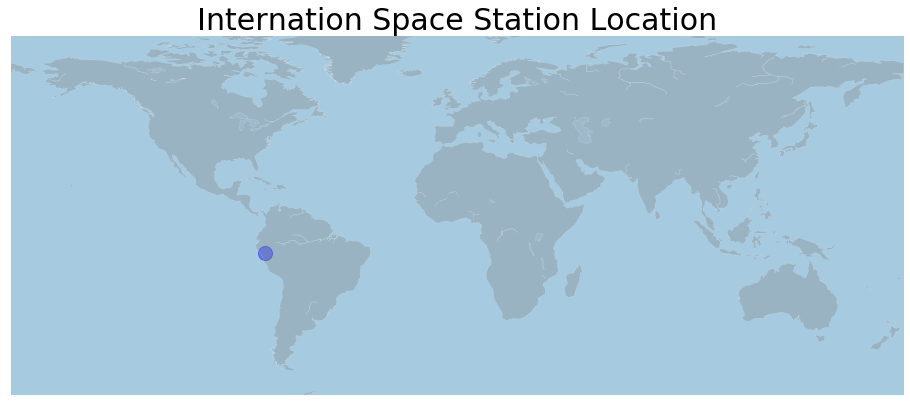

In [8]:
# Set the dimension of the figure
plt.figure(figsize=(16, 8))

# Make the background map
m=Basemap(llcrnrlon=-180, llcrnrlat=-65,urcrnrlon=180,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.3)
m.drawcoastlines(linewidth=0.1, color="white")

# Add a point per position

space_station_longitude, space_station_latitude = get_space_station_location()
m.scatter(space_station_longitude, space_station_latitude, s=200, alpha=0.4,color='blue')

 
plt.title('Internation Space Station Location' , fontsize=30)

In [9]:
print(space_station_longitude, space_station_latitude)

-77.4955 -7.5025


In [10]:
# figure out translation of space_station_longitude/space_station_latitude to screen pixels
# imagine 0,0 to 300,100
translate_geo_to_pixels(space_station_longitude, space_station_latitude, 300, 100)

(85.42041666666665, -54.16805555555555)